In [119]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [32]:
#Explore the tables with inspector
inspector = inspect(engine)
columns_1 = inspector.get_columns('measurement')
columns_2 = inspector.get_columns('station')
print('Measurement Table:')
for column in columns_1:
    print(column['name'], column['type'])
print('----------------')
print('Station Table:')
for column in columns_2:
    print(column['name'], column['type'])

Measurement Table:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
----------------
Station Table:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [46]:
# View a sample of the Measurement table
# 'ORDER BY date DESC' helps find the most recent date
print('Measurement:')
engine.execute('SELECT * FROM measurement ORDER BY date DESC LIMIT 10').fetchall()

Measurement:


[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0)]

In [147]:
# View the Station table
print('Station:')
engine.execute('SELECT * FROM station').fetchall()

Station:


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

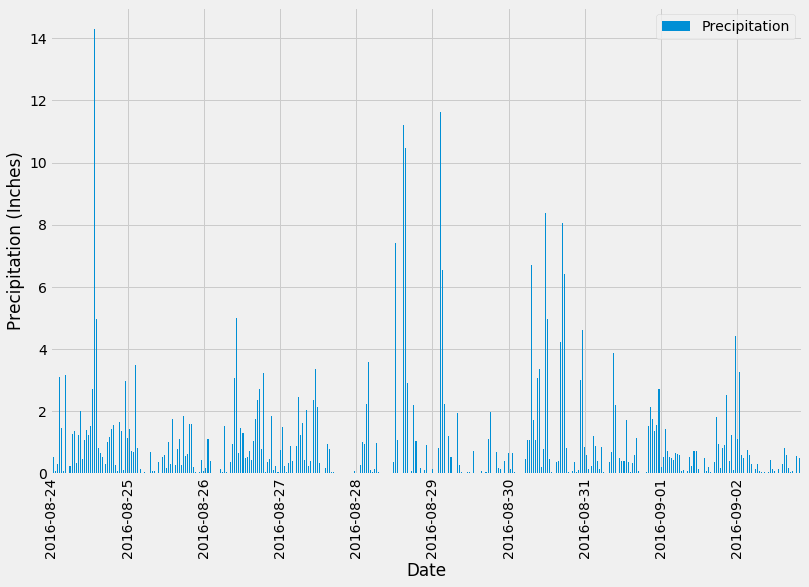

In [183]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel = [Measurement.date, Measurement.prcp]

# Calculate the date 1 year ago from the last data point in the database

    ## Did this using SQL query in above cell and counting backwards
    ## by a year from the highest date

# Perform a query to retrieve the data and precipitation scores
last_year_prcp = session.query(*sel).filter\
(func.strftime(Measurement.date) > '2016-08-23').order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_year_prcp, columns = ['date','prcp'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df = df.groupby('date')
prcp_sum = df['prcp'].sum()
df = pd.DataFrame({'Precipitation':prcp_sum})

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar(figsize = (12,8))
plt.locator_params(axis='x', nbins=10)
plt.ylabel('Precipitation (Inches)')
plt.xlabel('Date')
plt.show()

In [132]:
# Use Pandas to calculate the summary statistics for the precipitation data

# Copy code from cell above
sel = [Measurement.date, Measurement.prcp]
last_year_prcp = session.query(*sel).filter\
(func.strftime(Measurement.date) > '2016-08-23').order_by(Measurement.date).all()
df = pd.DataFrame(last_year_prcp, columns = ['Date','prcp'])

# Extract Month name from each date
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%B')
df = df.groupby('Date')

prcp_sum = df['prcp'].sum()
prcp_mean = df['prcp'].mean()
prcp_std = df['prcp'].std()

df = pd.DataFrame({'Total Precipitation (Inches)':prcp_sum,\
                   'Average Precipitation':prcp_mean,'Standard Deviation':prcp_std})
df

,Total Precipitation (Inches),Average Precipitation,Standard Deviation
Date,,,
April,54.91,0.321111,0.702469
August,23.28,0.181875,0.464483
December,35.51,0.199494,0.342967
February,39.06,0.241111,0.672922
January,11.95,0.070294,0.276047
July,23.72,0.134773,0.386084
June,20.52,0.120000,0.217726
March,29.62,0.175266,0.431165
May,25.27,0.151317,0.315384


In [150]:
# Design a query to show how many stations are available in this dataset?
engine.execute('SELECT COUNT(DISTINCT station) FROM measurement').fetchall()

[(9,)]

In [155]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
engine.execute('SELECT station, COUNT(station) AS "Station Count"\
               FROM measurement GROUP BY station ORDER BY "Station Count" DESC;').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [161]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
engine.execute('SELECT station, MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement\
                WHERE station = "USC00519281"').fetchall()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

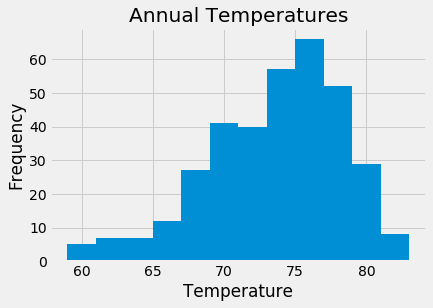

In [181]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temps = engine.execute('SELECT tobs FROM measurement WHERE station = "USC00519281"\
                        AND date > "2016-08-23"').fetchall()
df = pd.DataFrame(temps, columns = ['Annual Temperatures'])

df.hist(column = 'Annual Temperatures', bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

## Bonus Challenge Assignment

In [184]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [186]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
mytrip = calc_temps('2017-05-01', '2017-05-12')
print(mytrip)

[(65.0, 75.19117647058823, 80.0)]


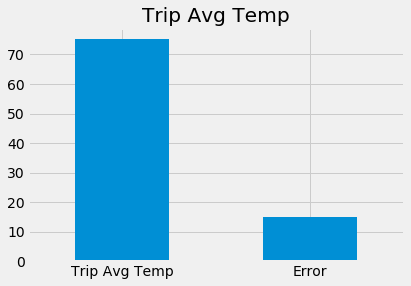

In [217]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmin = mytrip[0][0]
tavg = mytrip[0][1]
tmax = mytrip[0][2]
terr = tmax - tmin
df = pd.DataFrame([['Trip Avg Temp',tavg],['Error',terr]])
df.set_index(0, inplace=True)

df.plot.bar()
plt.title('Trip Avg Temp')
plt.xticks(rotation = 0)
plt.xlabel('')
plt.gca().get_legend().remove()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
